In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [2]:
import tensorflow as tf
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
#Importing Input data
data_cohesion = np.load('Inputs/4ft_cohesion.npy')
data_friction = np.load('Inputs/4ft_friction.npy')
data_poly = np.load('Inputs/4ft_poly_feature.npy')
data_watertable = np.load('Inputs/4ft_water_table.npy')
data_velo = np.load("Targets/4ft_velocity_plots.npy")
data_watertable = np.squeeze(data_watertable)

In [4]:
#Size
data_cohesion = np.transpose(data_cohesion)
data_friction = np.transpose(data_friction)
data_watertable = np.transpose(data_watertable)
data_watertable = np.squeeze(data_watertable)
print(np.shape(data_cohesion))
print(np.shape(data_friction))
print(np.shape(data_watertable))
print(np.shape(data_velo))
m = np.shape(data_cohesion)[1]
n_sim = np.shape(data_velo)[2]
n_final_test = 0
n_remain = n_sim - n_final_test
mo = np.shape(data_velo)[0]

(144807, 16)
(144807, 16)
(144807,)
(33, 33, 144807)


In [5]:
li= []
for i in range (n_sim):
    temp = np.reshape(data_velo[:,:,i],(mo*mo,1))
    li.append(temp)
data = np.array(li)

In [6]:
data_arr= np.zeros((n_remain,2*m + 1))
data_arr[0:n_remain,0:m] = data_cohesion[0:n_remain,:]
data_arr[0:n_remain,m:2*m] = data_friction[0:n_remain,:]
data_arr[0:n_remain,2*m] = data_watertable[0:n_remain]

In [7]:
data_x = data_arr
data_y = data[0:n_remain,:,:]
data_y = np.reshape(data_y, (n_remain,mo*mo))

In [8]:
np.shape(data_y)

(144807, 1089)

In [9]:
np.shape(data_arr)

(144807, 33)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)
ann1 = tf.keras.models.Sequential()
ann1.add(tf.keras.layers.Dense(units = 4096,activation = 'relu'))
ann1.add(tf.keras.layers.Dense(units = 4096,activation = 'relu'))
ann1.add(tf.keras.layers.Dense(units = 2048,activation = 'relu'))
ann1.add(tf.keras.layers.Dense(units = 1024,activation = 'relu'))
#Output Layer
ann1.add(tf.keras.layers.Dense(units = 1089 , activation = 'linear'))
ann1.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['accuracy'] )
ann1.fit(x_train,y_train,batch_size = 2048, epochs = 200)
#ann1.save('ann_velo_final_1.h5')

Epoch 1/200
57/57 [==============================] - 5s 63ms/step - loss: 0.8066 - accuracy: 0.0085
Epoch 2/200
57/57 [==============================] - 4s 62ms/step - loss: 0.6244 - accuracy: 0.0256
Epoch 3/200
57/57 [==============================] - 4s 62ms/step - loss: 0.5309 - accuracy: 0.0507
Epoch 4/200
57/57 [==============================] - 4s 63ms/step - loss: 0.4663 - accuracy: 0.0663
Epoch 5/200
57/57 [==============================] - 4s 63ms/step - loss: 0.4174 - accuracy: 0.0939
Epoch 6/200
57/57 [==============================] - 4s 63ms/step - loss: 0.3749 - accuracy: 0.1220
Epoch 7/200
57/57 [==============================] - 4s 63ms/step - loss: 0.3412 - accuracy: 0.1348
Epoch 8/200
57/57 [==============================] - 4s 63ms/step - loss: 0.3068 - accuracy: 0.1414
Epoch 9/200
57/57 [==============================] - 4s 63ms/step - loss: 0.2821 - accuracy: 0.1498
Epoch 10/200
57/57 [==============================] - 4s 63ms/step - loss: 0.2697 - accuracy: 0.1576

57/57 [==============================] - 4s 65ms/step - loss: 0.0410 - accuracy: 0.3224
Epoch 83/200
57/57 [==============================] - 4s 65ms/step - loss: 0.0347 - accuracy: 0.3249
Epoch 84/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0334 - accuracy: 0.3290
Epoch 85/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0335 - accuracy: 0.3301
Epoch 86/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0403 - accuracy: 0.3288
Epoch 87/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0351 - accuracy: 0.3336
Epoch 88/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0305 - accuracy: 0.3374
Epoch 89/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0259 - accuracy: 0.3397
Epoch 90/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0268 - accuracy: 0.3400
Epoch 91/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0297 - accuracy: 0.3402
Epo

57/57 [==============================] - 4s 64ms/step - loss: 0.0128 - accuracy: 0.4024
Epoch 163/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0129 - accuracy: 0.4023
Epoch 164/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0130 - accuracy: 0.4018
Epoch 165/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0128 - accuracy: 0.4026
Epoch 166/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0128 - accuracy: 0.4035
Epoch 167/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0131 - accuracy: 0.4040
Epoch 168/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0143 - accuracy: 0.4014
Epoch 169/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0154 - accuracy: 0.3965
Epoch 170/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0164 - accuracy: 0.3957
Epoch 171/200
57/57 [==============================] - 4s 64ms/step - loss: 0.0188 - accuracy: 0

In [11]:
y_pred = ann1.predict(x_test)
y_pred = sc.inverse_transform(y_pred)
y_actual = sc.inverse_transform(y_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2 = r2_score(y_actual,y_pred)
r2

906/906 [==============================] - 2s 2ms/step


0.6543499371097048

In [12]:
np.shape(y_pred[0,:])

(1089,)

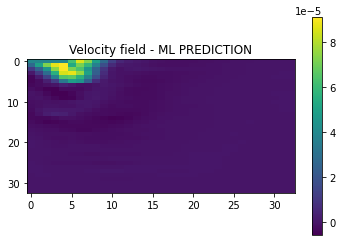

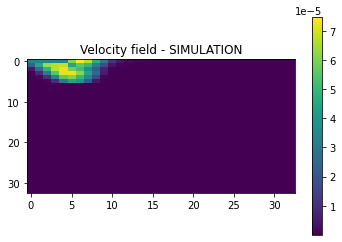

In [119]:
case = 4111
a = np.reshape(y_pred[case,:],(33,33))
b = np.reshape(y_actual[case,:],(33,33))
fig, ax1 = plt.subplots()
im1 = ax1.imshow(a, interpolation='nearest', aspect=0.5)
fig.colorbar(im1)
plt.title("Velocity field - ML PREDICTION")
fig, ax2 = plt.subplots()
im2 = ax2.imshow(b, interpolation='nearest',aspect = 0.5)
fig.colorbar(im2)
plt.title("Velocity field - SIMULATION")
plt.show()
plt.show()